# Multi-Type-TD-TSR Demo Notebook
## 1. Install all the prerequisite


In [1]:
# install dependencies: 
!pip install pyyaml==5.1
!pip install torch==1.7
!pip install torchvision==0.8.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions

!sudo apt install tesseract-ocr 
!pip install pytesseract

import torch, torchvision
torch.__version__
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

     |████████████████████████████████| 276kB 25.1MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=f38d4364565e94d0f6456b9c07438f18c16b1038c2085013c0bd25f476925a65
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 776.8MB 24kB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.7.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
     |████████████████████████████████| 12.7MB 10.5MB/s 
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling t

## 2. Clone the Repository 

In [35]:
! pip install easyocr

  Obtaining dependency information for easyocr from https://files.pythonhosted.org/packages/cb/0e/09bafec31db720e796d3f5b0814c37c5fdb59dcd35a2c6c6b1c774b09646/easyocr-1.7.1-py3-none-any.whl.metadata
  Using cached easyocr-1.7.1-py3-none-any.whl.metadata (11 kB)
  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/70/78/7a13730745684584db53e8aa3c3bd84beef2dcb32bebf627bda0d6df461e/opencv_python_headless-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python_headless-4.8.0.76-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/d7/d1/a4c715ad640c9eb0daaa77c4ce561b06e086bec44cbc79083e3548b00b76/scikit_image-0.21.0-cp38-cp38-win_amd64.whl.metadata
  Using cached scikit_image-0.21.0-cp38-cp38-win_amd64.whl.metadata (14 kB)
  Obtaining dependency information for imageio>=2.27 from https://files.pythonhosted.org/packages/eb/21/662994d78d8623

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\shyam\\OneDrive\\Documents\\deeplearning\\deep_learn\\mindful_ss_extraction\\ssenv\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.



In [4]:
import os
os.getcwd()

'c:\\Users\\shyam\\OneDrive\\Documents\\deeplearning\\deep_learn\\mindful\\main'

In [3]:
# !git clone https://github.com/Psarpei/Multi-Type-TD-TSR.git
!cd main

The system cannot find the path specified.


## 3. Download Table Detection Weights and Configuration File

In [10]:
!gdown --id 11FgFTy0MyVUMGd00T_InEDaarB4qAlP8
!gdown --id 1WBk6kHHyvyEzoPBsRr2BvFY51zURjd4R
!gdown --id 1PfA2uws919gc893-x9uMIz06zWEko8nF 

'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.


'gdown' is not recognized as an internal or external command,
operable program or batch file.


## 4. Import Everything

In [33]:
import detectron2
import google_colab.deskew as deskew
import google_colab.table_detection as table_detection
import google_colab.table_structure_recognition_all as tsra
import google_colab.table_structure_recognition_lines as tsrl
import google_colab.table_structure_recognition_wol as tsrwol
import google_colab.table_structure_recognition_lines_wol as tsrlwol
import google_colab.table_xml as txml
import google_colab.table_ocr as tocr
import pandas as pd
import os
import json

import itertools
import random
from detectron2.utils.logger import setup_logger
# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data import DatasetCatalog, MetadataCatalog
# from google.colab.patches import cv2_imshow
setup_logger()

<Logger detectron2 (DEBUG)>

## 5. Initialize Table Detection Detector

In [2]:
#create detectron config
cfg = get_cfg()

#set yaml
cfg.merge_from_file('All_X152.yaml')

#set model weights
cfg.MODEL.WEIGHTS = 'model_final.pth' # Set path model .pth

predictor = DefaultPredictor(cfg) 

[09/22 16:30:15 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from model_final.pth ...


The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


In [ ]:
document_example = cv2.imread("../screenshot/screenshot0 (2).jpg")

table_list, table_coords,_ = table_detection.make_prediction(document_example, predictor)
list_table_boxes = []
for table in table_list:
    finalboxes, output_img = tsrlwol.recognize_structure(table)
    list_table_boxes.append(finalboxes)

Image saved as extracted_tables\image_10.png
Image saved as extracted_tables\image_11.png


error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


# Table Rotation

In [ ]:
# path to the image scan of the document
file = "/content/Multi_Type_TD_TSR/images/rotated_example.jpeg" 

# load the image from disk
original_image = cv2.imread(file)
deskewed_image = deskew.deskewImage(original_image)

print("ORIGINAL IMAGE:")
cv2.imshow(original_image)

print()

print("DESKEWED IMAGE:")
cv2.imshow(deskewed_image)

# Table Detection

In [16]:
document_img = cv2.imread("../screenshot/screenshot0 (1).jpg")
table_detection.make_prediction(document_img, predictor)


KeyboardInterrupt: 

In [6]:
document_img = cv2.imread("..\screenshot\screenshot0 (3).jpg")
table_detection.make_prediction(document_img, predictor,show_result=True)


AttributeError: 'NoneType' object has no attribute 'shape'

Image saved as extracted_tables\image_8.png


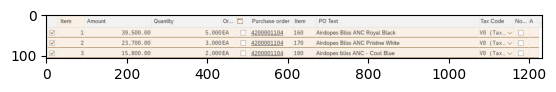

Image saved as extracted_tables\image_9.png


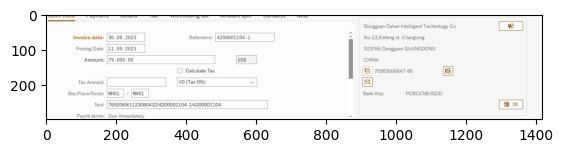

Image saved as extracted_tables\image_10.png


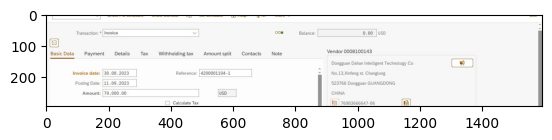

([array([[[255, 255, 255],
          [255, 255, 255],
          [237, 237, 237],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[250, 250, 250],
          [252, 252, 252],
          [218, 218, 218],
          ...,
          [213, 213, 213],
          [213, 213, 213],
          [213, 213, 213]],
  
         [[251, 251, 251],
          [252, 252, 252],
          [219, 219, 219],
          ...,
          [246, 246, 246],
          [246, 246, 246],
          [246, 246, 246]],
  
         ...,
  
         [[251, 251, 251],
          [255, 255, 255],
          [219, 219, 219],
          ...,
          [254, 254, 254],
          [254, 254, 254],
          [254, 254, 254]],
  
         [[251, 251, 251],
          [254, 254, 254],
          [217, 217, 217],
          ...,
          [250, 250, 250],
          [250, 250, 250],
          [250, 250, 250]],
  
         [[251, 251, 251],
          [253, 253, 253],
          [215, 215, 215

In [20]:
document_img = cv2.imread("..\screenshot\screenshot0 (4).jpg")
table_detection.make_prediction(document_img, predictor,show_result=True)


In [17]:
document_img = cv2.imread("..\screenshot\screenshot0 (2).jpg")
# table_detection.make_prediction(document_img, predictor,show_result=True)


In [18]:
_ ,table_list, table_coords = table_detection.make_prediction(document_img, predictor)

C:\Users\shyam\OneDrive\Documents\deeplearning\deep_learn\mindful_ss_extraction\ssenv\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Image saved as extracted_tables\image_0.png
Image saved as extracted_tables\image_1.png


In [20]:
table_list

[[30, 338, 1236, 276], [8, 264, 1482, 480]]

# Table Structure Recognition Partially Bordered Tables
# with Color Invariance Pre-Processing

In [27]:
list_table_boxes = []

for table in table_list:
    finalboxes, output_img = tsra.recognize_structure(table)
    list_table_boxes.append(finalboxes)

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


# XML Output 

In [ ]:
txml.output_to_xml(table_coords, list_table_boxes)

#Table Structure Recognition Bordered Tables

In [14]:
bordered_table = cv2.imread("/content/Multi_Type_TD_TSR/images/bordered_example.png")
list_table_boxes = []

table_list = [bordered_table]

for table in table_list:
    finalboxes, output_img = tsrl.recognize_structure(table)
    list_table_boxes.append(finalboxes)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


# Table Structure Recognition Unbordered Tables

In [13]:
unbordered_table = cv2.imread("/content/Multi_Type_TD_TSR/images/unbordered_example.jpg")
list_table_boxes = []

table_list = [unbordered_table]

for table in table_list:
    finalboxes, output_img = tsrwol.recognize_structure(table)
    list_table_boxes.append(finalboxes)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


# Table Structure Recognition Partially Bordered Tables

In [32]:
document_example = cv2.imread("../screenshot/screenshot0 (2).jpg")

table_list, table_coords,_ = table_detection.make_prediction(document_example, predictor)
list_table_boxes = []
for table in table_list:
    finalboxes, output_img = tsrlwol.recognize_structure(table)
    list_table_boxes.append(finalboxes)

Image saved as extracted_tables\image_8.png
Image saved as extracted_tables\image_9.png


error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [ ]:
document_example = cv2.imread("../screenshot/screenshot0 (2).jpg")

table_list, table_coords,_ = table_detection.make_prediction(document_example, predictor)
list_table_boxes = []
for table in table_list:
    finalboxes, output_img = tsrlwol.recognize_structure(table)
    list_table_boxes.append(finalboxes)

Image saved as extracted_tables\image_8.png
Image saved as extracted_tables\image_9.png


error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


# Additional Feature: OCR with PyTesserect (Output in CSV)

In [15]:
tocr.output_to_csv(list_table_boxes, output_img)

NameError: name 'output_img' is not defined